# Cifar 10 Classifier

The goal of this classifier is to establish baseline metrics. The following code can be used to train a German traffic sign classifier. Even though there are 43 classes of German traffic signs and only 10 classes of Cifar10 images, this classifier will perform significantly worse in terms of accuracy. Cifar10 images vary much more greatly than traffic signs. The difference between a ship and a frog is much greater than the difference between a "70 km/h" sign and a "Pedestrians" sign.

Note that the training accuracy is lower than the validation accuracy for the same epoch because the validation accuracy is obtained with the model at the end of an epoch whereas the training accuracy is the running average accuracy during an epoch. In other words, as the model is optimizing loss, it's getting better and better.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import numpy as np
import pickle
from skimage import color
from sklearn.model_selection import train_test_split

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# it's a good idea to flatten the array.
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify = y_train)

print("Loaded data")

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

num_image_channels = X_train.shape[-1]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of image channels =", num_image_channels)

Using TensorFlow backend.


170450944/170498071 [============================>.] - ETA: 0sLoaded data
Number of training examples = 35000
Number of validation examples = 15000
Number of testing examples = 10000
Image data shape = (32, 32, 3)
Number of classes = 10
Number of image channels = 3


# Data preprocessing

In [2]:
X_train = X_train.astype(np.float64)

mean_image = np.mean(X_train, axis=0, dtype=np.float64)
X_train_stddev = np.std(X_train)

X_train -= mean_image
X_train /= X_train_stddev

X_valid = X_valid.astype(np.float64)
X_valid -= mean_image
X_valid /= X_train_stddev

X_test = X_test.astype(np.float64)
X_test -= mean_image
X_test /= X_train_stddev

print("Normalized train, validation, and test datasets.")

Normalized train, validation, and test datasets.


In [10]:
from keras import utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers
from keras import callbacks
from sklearn.utils import shuffle

epochs = 60
droprate = 0.5
conv1_nfilters = 12
conv2_nfilters = 32
fc1_nodes = 120
fc2_nodes = 84
learning_rate = 0.001
activation = 'relu'

model = Sequential()
model.add(Conv2D(filters=conv1_nfilters, kernel_size=(5, 5), input_shape=(32, 32, 3)))
model.add(Activation(activation))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(droprate))
model.add(Conv2D(filters=conv2_nfilters, kernel_size=(5, 5)))
model.add(Activation(activation))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(droprate))
model.add(Flatten())
model.add(Dense(fc1_nodes))
model.add(Activation(activation))
model.add(Dropout(droprate))
model.add(Dense(fc2_nodes))
model.add(Activation(activation))
model.add(Dropout(droprate))
model.add(Dense(n_classes, activation='softmax'))

epoch_end = {}
epoch_end['train_loss'] = []
epoch_end['train_acc'] = []

class TrainCallback(callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        epoch_end['train_loss'].append(loss)
        epoch_end['train_acc'].append(acc)
        print('\nEpoch end loss: {}, acc: {}\n'.format(loss, acc))
        
y_one_hot = utils.to_categorical(y_train, n_classes)
y_valid_one_hot = utils.to_categorical(y_valid, n_classes)

adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_one_hot, batch_size=128, epochs=epochs, validation_data=(X_valid, y_valid_one_hot))
#                    callbacks=[TrainCallback((X_train, y_one_hot))])
        
score = model.evaluate(X_train, y_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 35000 samples, validate on 15000 samples
Epoch 1/60
35000/35000 [==============================] - 1s - loss: 2.1546 - acc: 0.1761 - val_loss: 1.9151 - val_acc: 0.3189
Epoch 2/60
35000/35000 [==============================] - 2s - loss: 1.8653 - acc: 0.2865 - val_loss: 1.7249 - val_acc: 0.4022
Epoch 3/60
35000/35000 [==============================] - 1s - loss: 1.7483 - acc: 0.3459 - val_loss: 1.5871 - val_acc: 0.4327
Epoch 4/60
35000/35000 [==============================] - 1s - loss: 1.6592 - acc: 0.3846 - val_loss: 1.5302 - val_acc: 0.4689
Epoch 5/60
35000/35000 [==============================] - 1s - loss: 1.5905 - acc: 0.4123 - val_loss: 1.4626 - val_acc: 0.4807
Epoch 6/60
35000/35000 [==============================] - 1s - loss: 1.5517 - acc: 0.4328 - val_loss: 1.3989 - val_acc: 0.5055
Epoch 7/60
35000/35000 [==============================] - 2s - loss: 1.5093 - acc: 0.4507 - val_loss: 1.3880 - val_acc: 0.5109
Epoch 8/60
35000/35000 [==============================] - 2s 

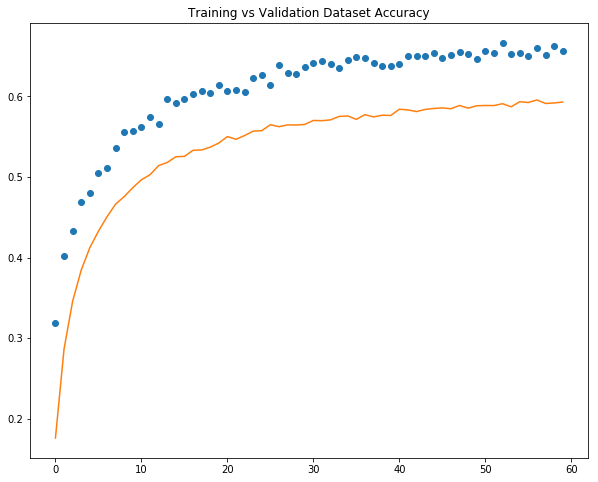

In [11]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Why is training accuracy lower than validation accuracy?
# Training accuracy is the average of accuracies of all batches during an epoch.
# Validation accuracy is the accuracy of the entire dataset.
# See https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss
plt.plot(history.history['val_acc'], 'o', label='baseline') 
plt.plot(history.history['acc'], '-', label='baseline') # This is the avg training acc for each batch
plt.plot(epoch_end['train_acc'], 'x', label='baseline') # This is the training acc at the end of an epoch.
plt.title("Training vs Validation Dataset Accuracy")

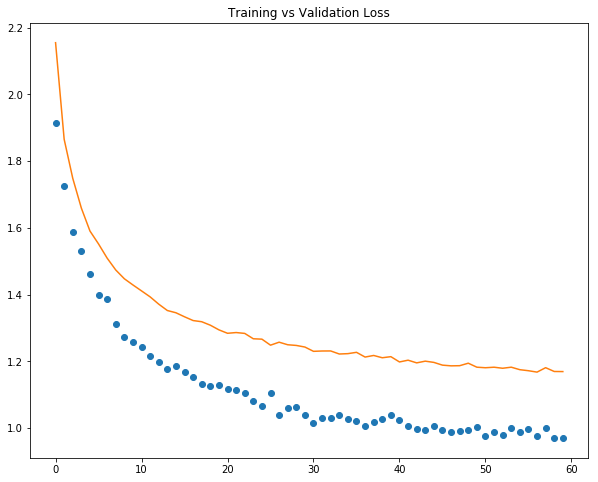

In [12]:
plt.plot(history.history['val_loss'], 'o', label='baseline')
plt.plot(history.history['loss'], '-', label='baseline')
plt.plot(epoch_end['train_loss'], 'x', label='baseline')
plt.title("Training vs Validation Loss")

In [13]:
from keras.models import load_model
model.save('model.h5')
model = load_model('model.h5')

y_test_one_hot = utils.to_categorical(y_test, n_classes)

score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.97154377346
Test accuracy: 0.6634
